## Phase demodulation using PSI-VU

PSI-VU is a factorization method that can be used to demodulate phase-shifting fringe patterns

### Generating the image sequence

In [1]:
%pylab inline
def peaks(M, N):
    y, x = np.ogrid[-3.0:3.0:M * 1j, -3.0:3.0:N * 1j]

    p = 1-x/2.0 + x**5 + y**3
    p*= np.exp(-x**2 - y**2)

    return p

def gaussian(sigma=10.0, shape=(512, 512)):
    M, N = shape
    y, x = np.ogrid[-M/2:M/2:M * 1j, -N/2:N/2:N * 1j]
    
    g_values = np.exp(-(x**2 + y**2)/(2*sigma**2))
    
    return g_values

Populating the interactive namespace from numpy and matplotlib


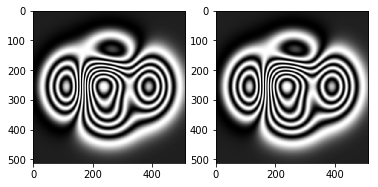

In [11]:
M, N = 512, 512
K = 3
phi = peaks(M,N)*32
delta = rand(3)*2*pi

background = 1.0 #gaussian(60)*3.7
contrast = 1.0 #gaussian(100)*3.7
images = [(background + contrast*cos(phi + dd)) for dd in delta]

subplot(121)
imshow(images[0], cmap=cm.gray)
subplot(122)
imshow(images[1], cmap=cm.gray)

### Estimating the phase
We will use the VU factorization to recover the phase

	Iteration 0000: Objective E:  1.000e-03 Current E: 2.145e+00
	Iteration 0002: Objective E:  1.000e-03 Current E: 1.332e+01
	Iteration 0004: Objective E:  1.000e-03 Current E: 3.738e+00
	Iteration 0006: Objective E:  1.000e-03 Current E: 2.072e+01
	Iteration 0008: Objective E:  1.000e-03 Current E: 1.001e+01
	Iteration 0010: Objective E:  1.000e-03 Current E: 9.952e+00
	Iteration 0012: Objective E:  1.000e-03 Current E: 9.931e+00
	Iteration 0014: Objective E:  1.000e-03 Current E: 9.980e+00
	Iteration 0016: Objective E:  1.000e-03 Current E: 1.014e+01
	Iteration 0018: Objective E:  1.000e-03 Current E: 3.660e+00
	Iteration 0020: Objective E:  1.000e-03 Current E: 1.913e+01
	Iteration 0022: Objective E:  1.000e-03 Current E: 3.360e+00
	Iteration 0024: Objective E:  1.000e-03 Current E: 8.451e+00
	Iteration 0026: Objective E:  1.000e-03 Current E: 3.912e+00
	Iteration 0028: Objective E:  1.000e-03 Current E: 1.051e+01


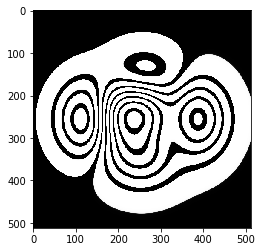

In [12]:
from fringes import demodulate, demodulate_psi

pp = demodulate(images, max_iters=30, verbose=True, verbose_step=2)

imshow(pp, cmap=cm.gray)